In [2]:
#Part A: Task 1:Python and Data  Handling(EDA)
#Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "STUDENTS_RAW_DATA.csv"
df = pd.read_csv(file_path)
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.\n")

Loaded dataset with 205 rows and 16 columns.



In [3]:
#Quick numeric & categorical summary
print("Numeric summary:\n")
display(df.describe(include=[np.number]).round(3))
print("\nCategorical summary:\n")
display(df.describe(include=['object']).T)

Numeric summary:



,age,study_hours_per_week,attendance_rate,prior_gpa_10pt,test_score
count,205.000,201.000,205.000,202.000,203.000
mean,23.205,12.362,74.586,7.299,71.091
std,12.388,7.019,16.906,1.328,17.879
min,-1.000,-3.000,45.300,4.020,-5.000
25%,19.000,8.900,59.800,6.510,60.000
50%,22.000,11.900,74.900,7.195,71.000
75%,24.000,15.300,89.500,7.958,81.150
max,120.000,60.000,104.400,11.500,133.000



Categorical summary:



,count,unique,top,freq
student_id,205,200,S0005,2
gender,201,9,Female,32
city,201,24,Mumbai,21
course_stream,161,8,MCA,27
has_internet,201,7,Y,35
device_type,171,5,Mobile,45
parental_education,159,5,Postgrad,38
admission_date,205,195,"May 01, 2025",3
fee_paid_inr,198,193,62772,2
scholarship,154,3,Partial,56


In [4]:
#Missingness and uniqueness
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False).round(2)
unique_counts = df.nunique().sort_values(ascending=False)

missing_table = pd.concat([missing_count, missing_pct], axis=1)
missing_table.columns = ["missing_count", "missing_pct"]
print("Top missingness (count, %):")
display(missing_table.head(15))

print("Column uniqueness (top 15):")
display(unique_counts.head(15))

Top missingness (count, %):


,missing_count,missing_pct
scholarship,51,24.88
parental_education,46,22.44
course_stream,44,21.46
comments,39,19.02
device_type,34,16.59
fee_paid_inr,7,3.41
study_hours_per_week,4,1.95
city,4,1.95
gender,4,1.95
has_internet,4,1.95


Column uniqueness (top 15):


student_id              200
admission_date          195
fee_paid_inr            193
attendance_rate         177
test_score              163
prior_gpa_10pt          146
study_hours_per_week    125
city                     24
age                      19
gender                    9
course_stream             8
has_internet              7
comments                  6
device_type               5
parental_education        5
dtype: int64

In [5]:
#Columns like 'scholarship', 'parental_education', 'course_stream' have notable missingness.
print("Check student_id uniqueness: ", df['student_id'].nunique() if 'student_id' in df.columns else "no student_id column", "\n")

Check student_id uniqueness:  200 



In [6]:
#Value counts for key categorical fields
keys = ['gender', 'city', 'course_stream', 'has_internet', 'device_type', 'scholarship']
print("Value counts for selected categorical columns (showing top values):\n")
for k in keys:
    if k in df.columns:
        print(f"--- {k} (top 10) ---")
        display(df[k].value_counts(dropna=False).head(10))
    else:
        print(f"Column '{k}' not found in dataset.")

Value counts for selected categorical columns (showing top values):

--- gender (top 10) ---


gender
Female               32
M                    30
                     26
male                 21
F                    20
FEMALE               19
Male                 19
Prefer not to say    17
Other                17
NaN                   4
Name: count, dtype: int64

--- city (top 10) ---


city
Mumbai        21
Remote        16
Bengaluru     15
Pune          12
Chennai       12
Kolkata       11
chennai       11
kolkata       10
hyderabad     10
Hyderabad      9
Name: count, dtype: int64

--- course_stream (top 10) ---


course_stream
NaN    44
MCA    27
BSc    27
EE     25
BBA    19
ME     19
CS     18
ECE    14
MBA    12
Name: count, dtype: int64

--- has_internet (top 10) ---


has_internet
Y          35
N          32
No         30
yes        30
no         27
Yes        24
Unknown    23
NaN         4
Name: count, dtype: int64

--- device_type (top 10) ---


device_type
Mobile     45
Tablet     37
NaN        34
laptop     32
Laptop     30
Desktop    27
Name: count, dtype: int64

--- scholarship (top 10) ---


scholarship
Partial    56
Yes        51
NaN        51
No         47
Name: count, dtype: int64

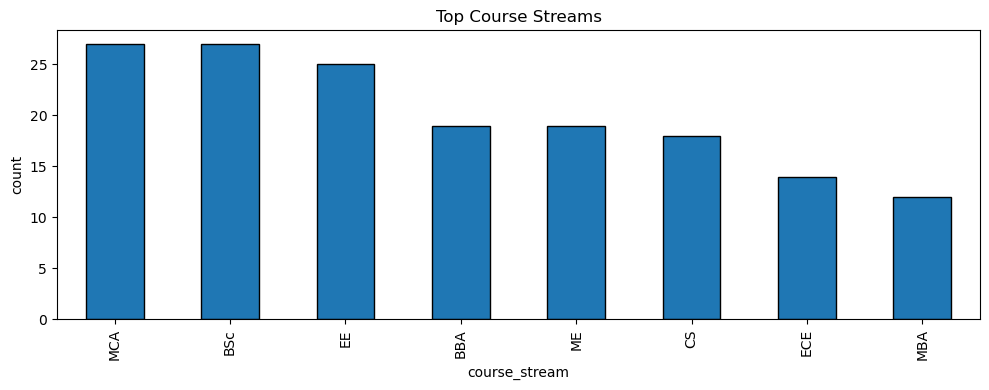

Interpretation: Distribution across streams — some streams dominate (e.g., MCA, BSc).


In [7]:
# Plot A: Course stream counts (bar)
plt.style.use('default')
if 'course_stream' in df.columns:
    plt.figure(figsize=(10,4))
    df['course_stream'].value_counts().head(12).plot(kind='bar', edgecolor='k')
    plt.title('Top Course Streams')
    plt.xlabel('course_stream')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()
    print("Interpretation: Distribution across streams — some streams dominate (e.g., MCA, BSc).")

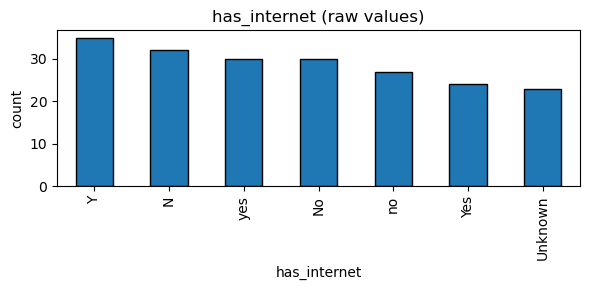

Interpretation: Many variants for yes/no — needs normalization before analysis.



In [8]:
# Plot B: Internet access (clean raw counts)
if 'has_internet' in df.columns:
    plt.figure(figsize=(6,3))
    df['has_internet'].value_counts().head(8).plot(kind='bar', edgecolor='k')
    plt.title('has_internet (raw values)')
    plt.xlabel('has_internet')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()
    print("Interpretation: Many variants for yes/no — needs normalization before analysis.\n")

In [9]:
eda_summary_text = """
Short EDA Summary

Dataset has **205 rows × 16 columns.  

1)Numeric columns (age, study_hours_per_week, prior_gpa_10pt, test_score, attendance_rate)  
  show generally reasonable ranges, but there are some anomalies (e.g., negative study hours, test scores above 100).  
  These will need fixing during preprocessing.  

2)Categorical columns contain inconsistencies:  
  - gender has mixed formats (M, Male, FEMALE, female, etc.).  
  - city has duplicates due to casing (e.g., Chennai vs chennai).  
  - has_internet mixes variants (Yes/No in different spellings, plus "Unknown").  
  - device_type mixes casing (Laptop vs laptop) and has "None".  
  - scholarship has missing values (~25%) and mixed entries (Yes/No/Partial).  

3)Missingness is highest in scholarship, parental_education, and course_stream.  
- student_id is not fully unique, indicating possible duplicate records.  

4)Visual insights (2 plots):
  - Course Stream Distribution: MCA and BSc are the most common streams, while many records are missing course_stream.  
  - Internet Access: Responses are inconsistent, but majority of students do report some form of internet access.  

Next Steps
- Standardize categorical values (gender, internet access, device_type).  
- Handle missingness (scholarship, parental_education, course_stream).  
- Fix impossible numeric values and outliers.  
- Ensure unique student-level records.  
"""

print(eda_summary_text)



Short EDA Summary

Dataset has **205 rows × 16 columns.  

1)Numeric columns (age, study_hours_per_week, prior_gpa_10pt, test_score, attendance_rate)  
  show generally reasonable ranges, but there are some anomalies (e.g., negative study hours, test scores above 100).  
  These will need fixing during preprocessing.  

2)Categorical columns contain inconsistencies:  
  - gender has mixed formats (M, Male, FEMALE, female, etc.).  
  - city has duplicates due to casing (e.g., Chennai vs chennai).  
  - has_internet mixes variants (Yes/No in different spellings, plus "Unknown").  
  - device_type mixes casing (Laptop vs laptop) and has "None".  
  - scholarship has missing values (~25%) and mixed entries (Yes/No/Partial).  

3)Missingness is highest in scholarship, parental_education, and course_stream.  
- student_id is not fully unique, indicating possible duplicate records.  

4)Visual insights (2 plots):
  - Course Stream Distribution: MCA and BSc are the most common streams, while 

In [10]:
#Part B:  Task 2: Data Cleaning & Preprocessing
import pandas as pd
import numpy as np
import re
from dateutil import parser
from pathlib import Path
from sklearn.impute import SimpleImputer

RAW = Path("STUDENTS_RAW_DATA.csv")
CLEAN_OUT = Path("STUDENTS_CLEANED_DATA.csv")
MODEL_OUT = Path("STUDENTS_MODEL_DATA.csv")

#Load raw data 
if not RAW.exists():
    raise FileNotFoundError(f"Raw file not found: {RAW}")
df_raw = pd.read_csv(RAW, dtype=str)
print(f"Loaded raw data: {df_raw.shape[0]} rows × {df_raw.shape[1]} cols")



Loaded raw data: 205 rows × 16 cols


In [11]:
#Standardize placeholder missing indicators
placeholders = ["", " ", "NA", "N/A", "na", "n/a", "None", "none",
                "Unknown", "unknown", "NULL", "null", "—", "-", "#N/A", "NaN", "nan"]
df = df_raw.copy()
for ph in placeholders:
    df.replace(ph, np.nan, inplace=True)
print("Placeholders standardized -> NaN")

Placeholders standardized -> NaN


In [12]:
#Trim whitespace & normalize text columns 
for c in df.select_dtypes(include="object").columns:
    df.loc[df[c].notna(), c] = df.loc[df[c].notna(), c].astype(str).str.strip()
print("Trimmed whitespace")


Trimmed whitespace


In [13]:
# Parse and reformat all date
from dateutil import parser
date_cols = [c for c in df.columns if "date" in c.lower()]
if date_cols:
    for col in date_cols:
        parsed = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
        #try parsing again with dayfirst=False where still NaT
        need_fix = parsed.isna()
        if need_fix.any():
            parsed2 = pd.to_datetime(df.loc[need_fix, col], errors="coerce", dayfirst=False)
            parsed.loc[need_fix] = parsed2
        #use dateutil parser for anything still NaT
        for idx in parsed[parsed.isna()].index:
            val = str(df.at[idx, col]).strip()
            if val and val.lower() not in ["nan", "none"]:
                try:
                    parsed.at[idx] = parser.parse(val, fuzzy=True)
                except Exception:
                    pass
        # Format to dd-mm-YYYY strings
        df[col] = parsed.dt.strftime("%d-%m-%Y")
        print(f"Parsed '{col}' into dd-mm-yyyy format ({df[col].notna().sum()} valid)")
else:
    print("No date-like columns found")

Parsed 'admission_date' into dd-mm-yyyy format (205 valid)


In [14]:
#Coerce numeric columns (handle currency & garbage) 
# Example: fee_paid_inr - remove non-numeric chars
if "fee_paid_inr" in df.columns:
    tmp = df["fee_paid_inr"].astype(str).str.replace(r"[^\d\.-]", "", regex=True).replace({"": np.nan})
    df["fee_paid_inr"] = pd.to_numeric(tmp, errors="coerce")

# other numeric candidates
num_candidates = ["age", "study_hours_per_week", "attendance_rate", "prior_gpa_10pt", "test_score"]
for c in num_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
print("Numeric coercion applied (non-numeric -> NaN)")


Numeric coercion applied (non-numeric -> NaN)


In [15]:
#Standardize categorical values 
# Gender
if "gender" in df.columns:
    def clean_gender(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"m","male","man","mr"}: return "Male"
        if s in {"f","female","woman","ms","mrs"}: return "Female"
        if s in {"prefer not to say","prefer not to answer","prefer_not_to_say"}: return "Prefer_not_to_say"
        if s in {"other","non-binary","nb"}: return "Other"
        return s.title()
    df["gender"] = df["gender"].apply(clean_gender)

# has_internet
if "has_internet" in df.columns:
    def clean_net(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"y","yes","true","1","available","yep","yeah"}: return "Yes"
        if s in {"n","no","false","0","not available","nope"}: return "No"
        return "Unknown"
    df["has_internet"] = df["has_internet"].apply(clean_net)

# device_type
if "device_type" in df.columns:
    def clean_device(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if "lap" in s or "notebook" in s: return "Laptop"
        if "phone" in s or "mobile" in s or "cell" in s: return "Mobile"
        if "desk" in s or s in {"pc","desktop"}: return "Desktop"
        if "tab" in s: return "Tablet"
        if s in {"none","na","n/a","null"}: return "None"
        return s.title()
    df["device_type"] = df["device_type"].apply(clean_device)

# scholarship
if "scholarship" in df.columns:
    def clean_sch(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"y","yes","true"}: return "Yes"
        if s in {"n","no","false"}: return "No"
        if "part" in s: return "Partial"
        return s.title()
    df["scholarship"] = df["scholarship"].apply(clean_sch)

# city -> title case
if "city" in df.columns:
    df["city"] = df["city"].where(df["city"].isna(), df["city"].str.title())

# simple title-case for some other categorical fields if present
for c in ["course_stream", "parental_education"]:
    if c in df.columns:
        df[c] = df[c].where(df[c].isna(), df[c].str.title())

print("Categorical values standardized to readable forms")


Categorical values standardized to readable forms


In [16]:
#Remove exact & student-level duplicates
before = len(df)
df = df.drop_duplicates(keep="first")
print(f"Exact duplicates removed: {before - len(df)}")

if "student_id" in df.columns:
    # pick first date-like column if present
    date_cols = [c for c in df.columns if "date" in c.lower()]
    if date_cols:
        dcol = date_cols[0]
        parsed = pd.to_datetime(df[dcol], errors="coerce", dayfirst=True)  # parse vectorized
        keep = []
        for sid, idx in df.groupby("student_id").groups.items():
            g = parsed.loc[idx]
            keep.append(int(g.idxmax()) if g.notna().any() else int(idx[0]))
        df = df.loc[keep].sort_values("student_id").reset_index(drop=True)
    else:
        df = df.drop_duplicates(subset=["student_id"], keep="first").sort_values("student_id").reset_index(drop=True)

print("Done. Final rows:", len(df))


Exact duplicates removed: 4
Done. Final rows: 200


In [17]:
#Fix impossible values & outliers (business rules)
if "age" in df.columns:
    df["age"] = pd.to_numeric(df["age"], errors="coerce")
    df.loc[(df["age"] < 10) | (df["age"] > 100), "age"] = np.nan

if "study_hours_per_week" in df.columns:
    df["study_hours_per_week"] = pd.to_numeric(df["study_hours_per_week"], errors="coerce")
    df.loc[(df["study_hours_per_week"] < 0) | (df["study_hours_per_week"] > 500), "study_hours_per_week"] = np.nan

if "test_score" in df.columns:
    df["test_score"] = pd.to_numeric(df["test_score"], errors="coerce")
    df.loc[(df["test_score"] < 0) | (df["test_score"] > 100), "test_score"] = np.nan

if "prior_gpa_10pt" in df.columns:
    df["prior_gpa_10pt"] = pd.to_numeric(df["prior_gpa_10pt"], errors="coerce")
    df.loc[(df["prior_gpa_10pt"] < 0) | (df["prior_gpa_10pt"] > 10), "prior_gpa_10pt"] = np.nan

print("impossible numeric values set to NaN where rules violated")


impossible numeric values set to NaN where rules violated


In [22]:
#Imputation
numeric_for_impute = [c for c in ["age","study_hours_per_week","attendance_rate","prior_gpa_10pt","test_score","fee_paid_inr"] if c in df.columns]
if numeric_for_impute:
    num_imp = SimpleImputer(strategy="median")
    df[numeric_for_impute] = num_imp.fit_transform(df[numeric_for_impute])
    print("Median imputed numeric columns:", numeric_for_impute)

# Categorical mode imputation
categorical_for_impute = [c for c in ["gender","device_type","has_internet","course_stream","scholarship","city","parental_education"] if c in df.columns]
for c in categorical_for_impute:
    if df[c].isna().any():
        mode_vals = df[c].mode(dropna=True)
        fill = mode_vals.iloc[0] if not mode_vals.empty else "Unknown"
        df[c] = df[c].fillna(fill)
print("Categorical NaNs filled with mode/default")


#'comments' column's all empty/missing set to "None"
if "comments" in df.columns:
    df["comments"] = df["comments"].astype(str).str.strip()
    df.loc[df["comments"].isna() | df["comments"].eq("") | df["comments"].isin(["nan","NaN","none","NONE"]), "comments"] = "None"
    print("Fixed 'comments' column: all empty/missing replaced with 'None'")
else:
    print("'comments' column not found in df")


Median imputed numeric columns: ['age', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'test_score', 'fee_paid_inr']
Categorical NaNs filled with mode/default
Fixed 'comments' column: all empty/missing replaced with 'None'


In [19]:
#Encoding for model readiness
model_df = df.copy()
encode_cols = [c for c in categorical_for_impute if c in model_df.columns]
if encode_cols:
    model_df = pd.get_dummies(model_df, columns=encode_cols, prefix=encode_cols, prefix_sep="__", drop_first=False)
    print("One-hot encoded categorical columns for model readiness:", encode_cols)
else:
    print("No categorical columns found to encode")

One-hot encoded categorical columns for model readiness: ['gender', 'device_type', 'has_internet', 'course_stream', 'scholarship', 'city', 'parental_education']


In [20]:

# Save outputs
df.to_csv(CLEAN_OUT, index=False)
model_df.to_csv(MODEL_OUT, index=False)
print(f"Saved cleaned dataset: {CLEAN_OUT} ({df.shape[0]} × {df.shape[1]})")
print(f"Saved model-ready dataset: {MODEL_OUT} ({model_df.shape[0]} × {model_df.shape[1]})")


Saved cleaned dataset: STUDENTS_CLEANED_DATA.csv (200 × 16)
Saved model-ready dataset: STUDENTS_MODEL_DATA.csv (200 × 42)


In [23]:

# Calculate missingness 
missingness = df.isna().mean().sort_values(ascending=False) * 100
top10_missing = missingness.head(10).reset_index()
top10_missing.columns = ["Column", "% Missing"]

print("=== Final Missingness (Top 10 Columns) ===")
print(top10_missing.to_string(index=False))

#Note:
#Parental_Education and Scholarship were intentionally kept as "Unknown" where data was missing.
#For reporting, "Unknown" is treated as missing, but in the cleaned dataset these are left as explicit categories so that no rows are dropped.



=== Final Missingness (Top 10 Columns) ===
              Column  % Missing
          student_id        0.0
                 age        0.0
              gender        0.0
                city        0.0
       course_stream        0.0
study_hours_per_week        0.0
     attendance_rate        0.0
      prior_gpa_10pt        0.0
        has_internet        0.0
         device_type        0.0
